In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Charger les données
data = pd.read_csv("fic_epita_kantar_codes.csv", sep=";", encoding="latin-1")  # ou encoding="iso-8859-1"
variables_orange = ["A9_1_slice",
                    "A9_2_slice",
                    "A9_3_slice",
                    "A9_4_slice",
                    "A9_5_slice",
                    "A9_6_slice",
                    "A9_7_slice",
                    "A9_8_slice",
                    "A9_9_slice",
                    "A9_10_slice",
                    "A9_11_slice",
                    "A9_12_slice",
                    "A9_13_slice",
                    "A9_14_slice",
                    "A9_15_slice",
                    "A9_16_slice",
                    "A10_1_slice",
                    "A10_2_slice",
                    "A10_3_slice",
                    "A10_4_slice",
                    "A10_5_slice",
                    "A10_6_slice",
                    "A10_7_slice",
                    "A10_8_slice",
                    "A11_1_slice",
                    "A11_2_slice",
                    "A11_3_slice",
                    "A11_4_slice",
                    "A11_5_slice",
                    "A11_6_slice",
                    "A11_7_slice",
                    "A11_8_slice",
                    "A11_9_slice",
                    "A11_10_slice",
                    "A11_11_slice",
                    "A11_12_slice",
                    "A11_13_slice",
                    ]
variables_vert = ["A11", "A12", "A13", "A14", "A4", "A5", "A5bis",
                  "A8_1_slice", "A8_2_slice", "A8_3_slice", "A8_4_slice",
                  "B1_1_slice", "B1_2_slice", "B2_1_slice", "B2_2_slice",
                  "B3", "B4", "B6", "C1_1_slice", "C1_2_slice", "C1_3_slice", 
                  "C1_4_slice", "C1_5_slice", "C1_6_slice", "C1_7_slice", 
                  "C1_8_slice", "C1_9_slice"]

In [32]:
data_orange = data[variables_orange]
data_vert = data[variables_vert]
print(data_orange.shape)
print(data_vert.shape)

(5000, 37)
(5000, 27)


In [33]:
#print(data_vert.head())
# If a column has NaN values, fill them with the mean of the column
data_vert = data_vert.fillna(data_vert.mean())
print(data_vert.head())


   A11  A12  A13  A14  A4        A5     A5bis  A8_1_slice  A8_2_slice  \
0    1    0    0    0   1  2.000000  1.821206           2           2   
1    1    0    0    0   1  5.000000  1.821206           2           0   
2    1    0    0    0   1  2.000000  1.821206           5           5   
3    1    1    1    0   1  1.000000  1.821206           2           3   
4    0    1    0    0   2  2.326399  1.000000           1           1   

   A8_3_slice  ...  B6  C1_1_slice  C1_2_slice  C1_3_slice  C1_4_slice  \
0           2  ...   3           2           2           2           2   
1           0  ...   3           4           4           4           4   
2           1  ...   4           4           4           4           4   
3           2  ...   4           4           4           5           5   
4           1  ...   3           4           4           4           4   

   C1_5_slice  C1_6_slice  C1_7_slice  C1_8_slice  C1_9_slice  
0           2           2           2           2   

In [34]:

# Standardiser les données
scaler = StandardScaler()
data_orange_scaled = scaler.fit_transform(data_orange)
data_vert_scaled = scaler.fit_transform(data_vert)


# Fonction pour effectuer le clustering
def perform_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    silhouette = silhouette_score(data, clusters)
    return clusters, kmeans, silhouette

# Clustering pour les deux groupes de variables
clusters_orange, kmeans_orange, silhouette_orange = perform_clustering(data_orange_scaled, 3)
clusters_vert, kmeans_vert, silhouette_vert = perform_clustering(data_vert_scaled, 5)

print(f"Silhouette Score (Orange): {silhouette_orange}")
print(f"Silhouette Score (Vert): {silhouette_vert}")




Silhouette Score (Orange): 0.15000104165982003
Silhouette Score (Vert): 0.1455179980633828


Params: n_clusters=2, init=k-means++, n_init=10, max_iter=200 -> Silhouette Score: 0.190
Params: n_clusters=2, init=k-means++, n_init=10, max_iter=300 -> Silhouette Score: 0.190
Params: n_clusters=2, init=k-means++, n_init=10, max_iter=400 -> Silhouette Score: 0.190
Params: n_clusters=2, init=k-means++, n_init=20, max_iter=200 -> Silhouette Score: 0.190
Params: n_clusters=2, init=k-means++, n_init=20, max_iter=300 -> Silhouette Score: 0.190
Params: n_clusters=2, init=k-means++, n_init=20, max_iter=400 -> Silhouette Score: 0.190
Params: n_clusters=2, init=k-means++, n_init=30, max_iter=200 -> Silhouette Score: 0.190
Params: n_clusters=2, init=k-means++, n_init=30, max_iter=300 -> Silhouette Score: 0.190
Params: n_clusters=2, init=k-means++, n_init=30, max_iter=400 -> Silhouette Score: 0.190
Params: n_clusters=2, init=random, n_init=10, max_iter=200 -> Silhouette Score: 0.190
Params: n_clusters=2, init=random, n_init=10, max_iter=300 -> Silhouette Score: 0.190
Params: n_clusters=2, init=

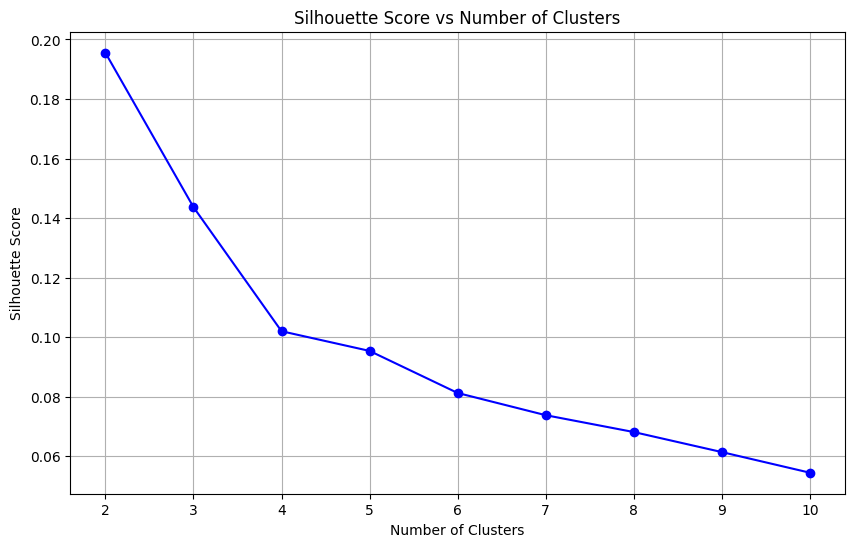

In [35]:
def perform_clustering_with_tuning(data):
    best_score = -1
    best_params = {}
    best_clusters = None
    best_model = None
    
    # Parameters to try
    n_clusters_range = range(2, 11)  # Try clusters from 2 to 10
    init_methods = ['k-means++', 'random']
    n_init_values = [10, 20, 30]
    max_iter_values = [200, 300, 400]
    
    for n_clusters in n_clusters_range:
        for init in init_methods:
            for n_init in n_init_values:
                for max_iter in max_iter_values:
                    kmeans = KMeans(
                        n_clusters=n_clusters,
                        init=init,
                        n_init=n_init,
                        max_iter=max_iter,
                        random_state=42
                    )
                    
                    clusters = kmeans.fit_predict(data)
                    score = silhouette_score(data, clusters)
                    
                    if score > best_score:
                        best_score = score
                        best_params = {
                            'n_clusters': n_clusters,
                            'init': init,
                            'n_init': n_init,
                            'max_iter': max_iter
                        }
                        best_clusters = clusters
                        best_model = kmeans
                    
                    print(f"Params: n_clusters={n_clusters}, init={init}, "
                          f"n_init={n_init}, max_iter={max_iter} -> "
                          f"Silhouette Score: {score:.3f}")
    
    print("\nBest Parameters:")
    for param, value in best_params.items():
        print(f"{param}: {value}")
    print(f"Best Silhouette Score: {best_score:.3f}")
    
    return best_clusters, best_model, best_score

# Perform tuned clustering for orange variables
clusters_orange, kmeans_orange, silhouette_orange = perform_clustering_with_tuning(data_orange_scaled)

# Visualize silhouette scores for different numbers of clusters
import matplotlib.pyplot as plt

def plot_silhouette_scores(data):
    silhouette_scores = []
    n_clusters_range = range(2, 11)
    
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(data)
        score = silhouette_score(data, clusters)
        silhouette_scores.append(score)
    
    plt.figure(figsize=(10, 6))
    plt.plot(n_clusters_range, silhouette_scores, 'bo-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.grid(True)
    plt.show()

# Plot silhouette scores
plot_silhouette_scores(data_orange)


Comparaison des prétraitements avec différentes métriques:

Sans standardisation:
Essai de différents algorithmes de clustering:

1. Gaussian Mixture Model:
   2 composants:
      Silhouette = 0.005
      Calinski-Harabasz = 52.864
      Davies-Bouldin = 9.020
   3 composants:
      Silhouette = 0.088
      Calinski-Harabasz = 586.397
      Davies-Bouldin = 2.525
   4 composants:
      Silhouette = 0.006
      Calinski-Harabasz = 435.064
      Davies-Bouldin = 9.667
   5 composants:
      Silhouette = 0.002
      Calinski-Harabasz = 307.159
      Davies-Bouldin = 8.554

2. DBSCAN:

3. Hierarchical Clustering:
   2 clusters, ward:
      Silhouette = 0.205
      Calinski-Harabasz = 1321.145
      Davies-Bouldin = 1.715
   2 clusters, complete:
      Silhouette = 0.176
      Calinski-Harabasz = 1424.397
      Davies-Bouldin = 1.795
   2 clusters, average:
      Silhouette = 0.316
      Calinski-Harabasz = 3.005
      Davies-Bouldin = 0.545
   3 clusters, ward:
      Silhouette = 0.108
   

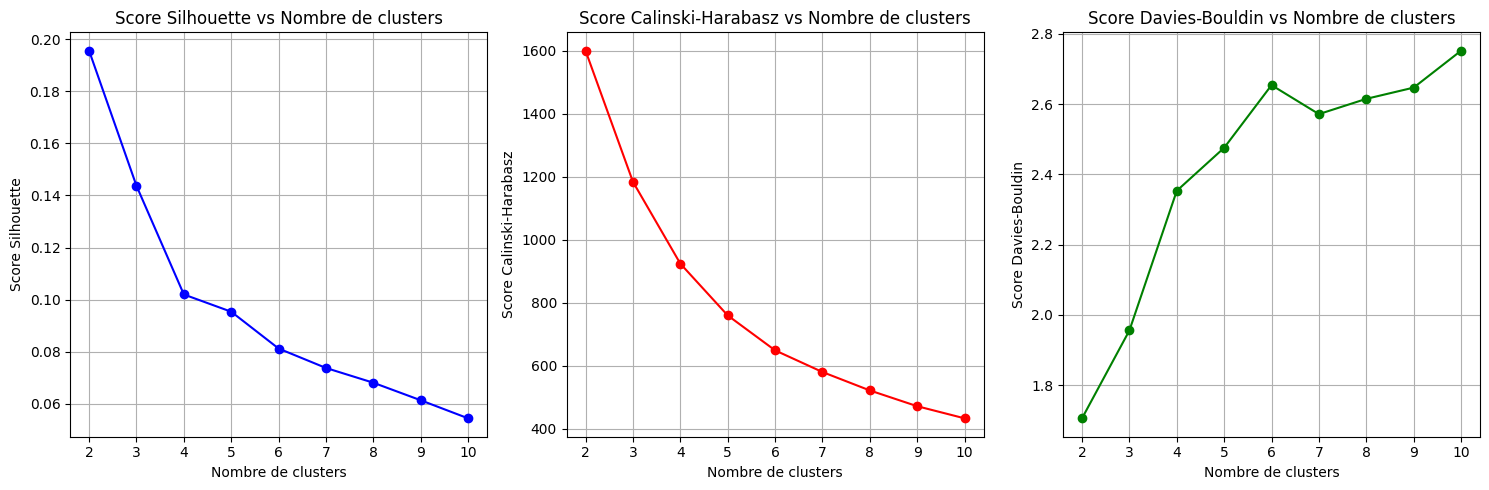

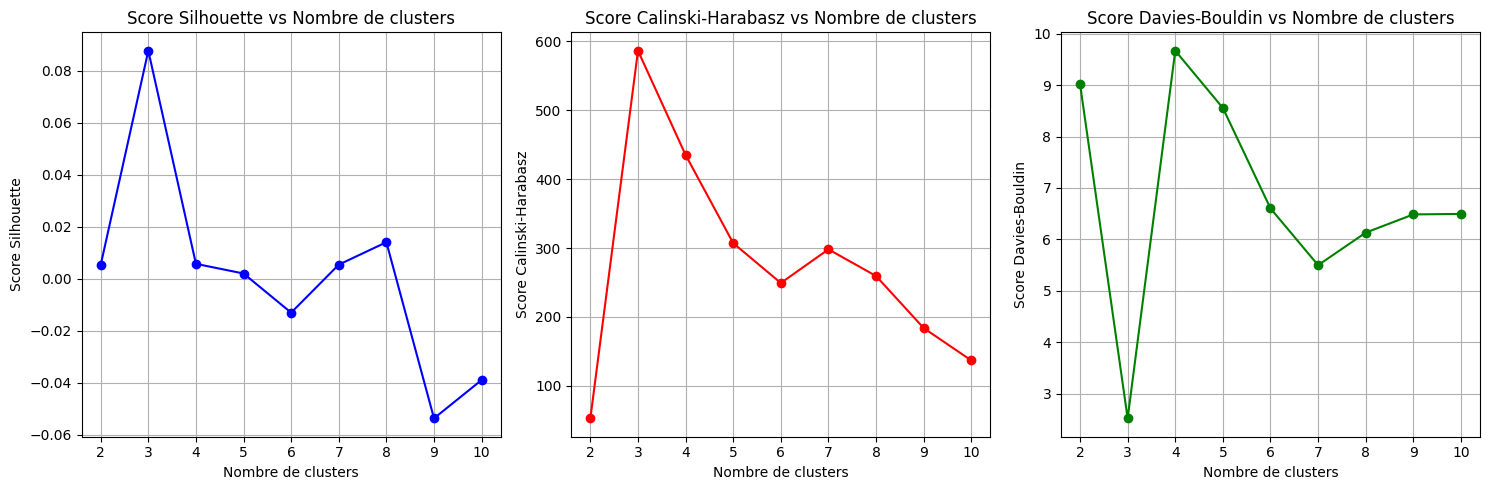

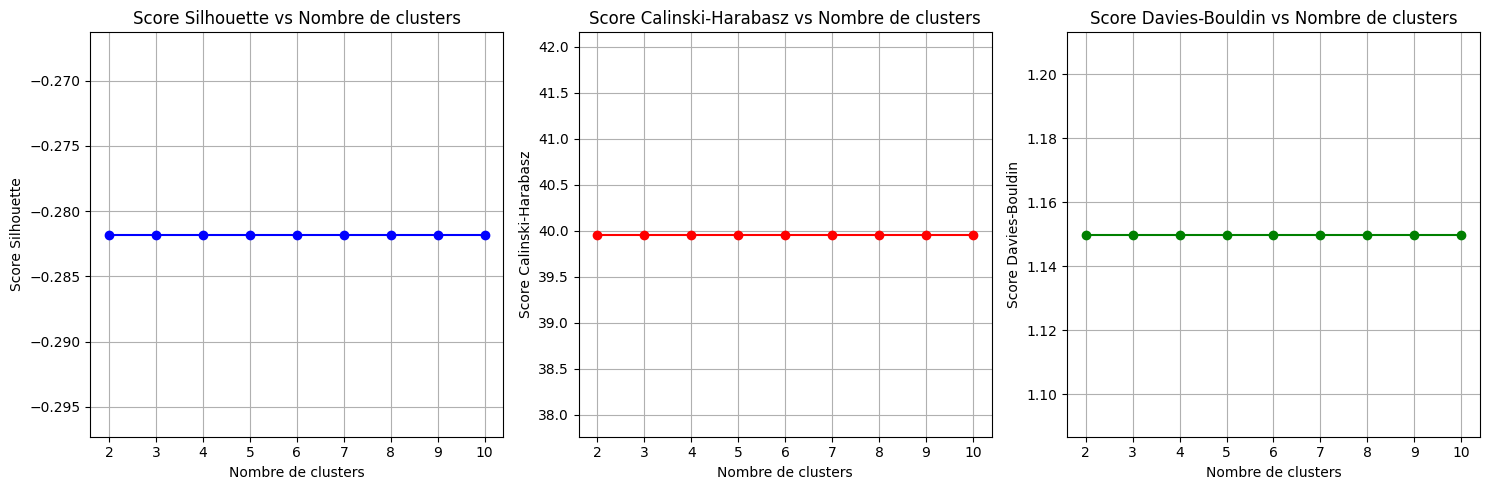

In [36]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN, AgglomerativeClustering

def evaluate_clustering(data, labels):
    """
    Calcule plusieurs métriques d'évaluation pour le clustering
    """
    if len(np.unique(labels)) < 2:  # Si moins de 2 clusters, certaines métriques ne fonctionnent pas
        return None
    
    # Éviter les labels -1 (noise) pour certaines métriques
    if -1 in labels:
        return None
        
    metrics = {
        'silhouette': silhouette_score(data, labels),
        'calinski': calinski_harabasz_score(data, labels),
        'davies': davies_bouldin_score(data, labels)
    }
    return metrics

def try_different_clustering(data):
    print("Essai de différents algorithmes de clustering:\n")
    
    # 1. Gaussian Mixture Model
    print("1. Gaussian Mixture Model:")
    for n_components in range(2, 6):
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        clusters = gmm.fit_predict(data)
        metrics = evaluate_clustering(data, clusters)
        if metrics:
            print(f"   {n_components} composants:")
            print(f"      Silhouette = {metrics['silhouette']:.3f}")
            print(f"      Calinski-Harabasz = {metrics['calinski']:.3f}")
            print(f"      Davies-Bouldin = {metrics['davies']:.3f}")
    
    # 2. DBSCAN
    print("\n2. DBSCAN:")
    eps_values = [0.5, 1, 1.5, 2]
    min_samples_values = [5, 10, 15]
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(data)
            metrics = evaluate_clustering(data, clusters)
            if metrics:
                n_clusters = len(np.unique(clusters))
                print(f"   eps={eps}, min_samples={min_samples} ({n_clusters} clusters):")
                print(f"      Silhouette = {metrics['silhouette']:.3f}")
                print(f"      Calinski-Harabasz = {metrics['calinski']:.3f}")
                print(f"      Davies-Bouldin = {metrics['davies']:.3f}")
    
    # 3. Hierarchical Clustering
    print("\n3. Hierarchical Clustering:")
    for n_clusters in range(2, 6):
        for linkage in ['ward', 'complete', 'average']:
            hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            clusters = hc.fit_predict(data)
            metrics = evaluate_clustering(data, clusters)
            if metrics:
                print(f"   {n_clusters} clusters, {linkage}:")
                print(f"      Silhouette = {metrics['silhouette']:.3f}")
                print(f"      Calinski-Harabasz = {metrics['calinski']:.3f}")
                print(f"      Davies-Bouldin = {metrics['davies']:.3f}")

# Essayer différentes approches de prétraitement
print("Comparaison des prétraitements avec différentes métriques:\n")

# 1. Données brutes
data_raw = data[variables_orange]
print("Sans standardisation:")
try_different_clustering(data_raw)

# 2. Avec StandardScaler
print("\nAvec StandardScaler:")
try_different_clustering(data_orange_scaled)

# 3. Avec RobustScaler
from sklearn.preprocessing import RobustScaler
data_robust = RobustScaler().fit_transform(data[variables_orange])
print("\nAvec RobustScaler:")
try_different_clustering(data_robust)

# 4. Avec MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
data_minmax = MinMaxScaler().fit_transform(data[variables_orange])
print("\nAvec MinMaxScaler:")
try_different_clustering(data_minmax)

# 5. Avec PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_orange)
print(f"\nAvec PCA (nombre de composantes: {data_pca.shape[1]}):")
try_different_clustering(data_pca)

# Visualisation des résultats pour différents nombres de clusters
def plot_metrics_comparison(data, model_name="KMeans"):
    n_clusters_range = range(2, 11)
    silhouette_scores = []
    calinski_scores = []
    davies_scores = []
    
    for n_clusters in n_clusters_range:
        if model_name == "KMeans":
            model = KMeans(n_clusters=n_clusters, random_state=42)
        elif model_name == "GaussianMixture":
            model = GaussianMixture(n_components=n_clusters, random_state=42)
        elif model_name == "DBSCAN":
            model = DBSCAN(eps=0.5, min_samples=5)
        labels = model.fit_predict(data)
        
        silhouette_scores.append(silhouette_score(data, labels))
        calinski_scores.append(calinski_harabasz_score(data, labels))
        davies_scores.append(davies_bouldin_score(data, labels))
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    ax1.plot(n_clusters_range, silhouette_scores, 'bo-')
    ax1.set_xlabel('Nombre de clusters')
    ax1.set_ylabel('Score Silhouette')
    ax1.set_title('Score Silhouette vs Nombre de clusters pour le modèle ' + model_name)
    ax1.grid(True)
    
    ax2.plot(n_clusters_range, calinski_scores, 'ro-')
    ax2.set_xlabel('Nombre de clusters')
    ax2.set_ylabel('Score Calinski-Harabasz')
    ax2.set_title('Score Calinski-Harabasz vs Nombre de clusters pour le modèle ' + model_name)
    ax2.grid(True)
    
    ax3.plot(n_clusters_range, davies_scores, 'go-')
    ax3.set_xlabel('Nombre de clusters')
    ax3.set_ylabel('Score Davies-Bouldin')
    ax3.set_title('Score Davies-Bouldin vs Nombre de clusters pour le modèle ' + model_name)
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()

# Visualiser les métriques pour les données standardisées
plot_metrics_comparison(data_orange, "KMeans")
plot_metrics_comparison(data_orange, "GaussianMixture")
plot_metrics_comparison(data_orange, "DBSCAN")



In [39]:
# Ajouter les clusters aux données
data["Cluster_Orange"] = clusters_orange
data["Cluster_Vert"] = clusters_vert

# Étape 2 : Réaffectation avec variables actives
X_orange = data[variables_orange]
y_orange = data["Cluster_Orange"]
X_train, X_test, y_train, y_test = train_test_split(X_orange, y_orange, test_size=0.2, random_state=42)

rf_orange = RandomForestClassifier(random_state=42)
rf_orange.fit(X_train, y_train)
y_pred_orange = rf_orange.predict(X_test)

print("Classification Report (Orange):")
print(classification_report(y_test, y_pred_orange))

# Étape 3 : Réaffectation avec variables illustratives
illustrative_vars = ["rs3", "rs5", "rs6", "RS1", "RS191", "RS192", "RS193"]
X_illustrative = data[illustrative_vars]
y_vert = data["Cluster_Vert"]

X_train, X_test, y_train, y_test = train_test_split(X_illustrative, y_vert, test_size=0.2, random_state=42)

rf_illustrative = RandomForestClassifier(random_state=42)
rf_illustrative.fit(X_train, y_train)
y_pred_illustrative = rf_illustrative.predict(X_test)

print("Classification Report (Illustrative):")
print(classification_report(y_test, y_pred_illustrative))

Classification Report (Orange):
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       543
           1       0.95      0.94      0.94       457

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

Classification Report (Illustrative):
              precision    recall  f1-score   support

           0       0.31      0.07      0.12       270
           1       0.11      0.02      0.03        56
           2       0.49      0.87      0.62       394
           3       0.70      0.73      0.71       202
           4       0.00      0.00      0.00        78

    accuracy                           0.51      1000
   macro avg       0.32      0.34      0.30      1000
weighted avg       0.42      0.51      0.42      1000

